In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gtfile='/Users/irffanalahi/Research/Research_update/GENE/Someresults/Bcell_toxicity/downstream/ALL_tox_gt.txt'

gtdf=pd.read_csv(gtfile,sep='\t',index_col=0)
gtdf.head()

,Toxicity
Mixture,
tot-YUCLUE_20-3998-cfDNA,NaN
tot-YUMARS_15-3443-cfDNA,NaN
tot-YUMICRO_20-4006-cfDNA,NaN
tot-YUMOTE_17-3755-cfDNA,NaN
tot-YUPRAF_19-3925-cfDNA,1.0


In [2]:
gtdf=gtdf[gtdf['Toxicity'].notna()]
gtdf.head()

,Toxicity
Mixture,
tot-YUPRAF_19-3925-cfDNA,1.0
tot-YUTAUR_19-3926-cfDNA,3.0
tot-YUTHEA_20-4000-cfDNA,1.0
Y-3674-cfDNA,0.0
Y-3688-cfDNA,3.0


In [3]:
gtdf.shape

(48, 1)

In [4]:
promoter_avg_file='/Users/irffanalahi/Research/Research_update/GENE/Someresults/Bcell_toxicity/downstream/fresh_boxplots/melanoma_bg_BS_all_matrix_intesectedwith_Bcell_toxicity_promoter_singleValue.txt_Bcell_toxicity_promoter_singleValue.txt_prepared_NAhandled_forregression/IL10.txt_median.txt'
promoter_avg_df=pd.read_csv(promoter_avg_file,sep='\t',index_col=0)

promoter_avg_df.head()

,IL10_median
Mixture,
tot-YUPRAF_19-3925-cfDNA,0.201
tot-YUTHEA_20-4000-cfDNA,0.180
tot-YUTAUR_19-3926-cfDNA,0.402
Y-3688-cfDNA,0.667


In [5]:
if 'mean' in promoter_avg_df.columns[0]:
    genename=promoter_avg_df.columns[0].replace('_mean','')
    
    txttoadd='mean'
elif 'median' in promoter_avg_df.columns[0]:
    genename=promoter_avg_df.columns[0].replace('_median','')
    txttoadd='median'


In [6]:
promoter_avg_df['1-'+txttoadd+' promoter methylation']=1-promoter_avg_df[promoter_avg_df.columns[0]]

In [7]:
promoter_avg_df.shape

(4, 2)

In [8]:
merged=promoter_avg_df.merge(gtdf,left_index=True, right_index=True)

merged.shape

(4, 3)

In [9]:
merged.head()

,IL10_median,1-median promoter methylation,Toxicity
Mixture,,,
tot-YUPRAF_19-3925-cfDNA,0.201,0.799,1.0
tot-YUTHEA_20-4000-cfDNA,0.180,0.820,1.0
tot-YUTAUR_19-3926-cfDNA,0.402,0.598,3.0
Y-3688-cfDNA,0.667,0.333,3.0


In [10]:
#merged.boxplot(by ='Toxicity', column =['1-avg promoter methylation'], grid = False)

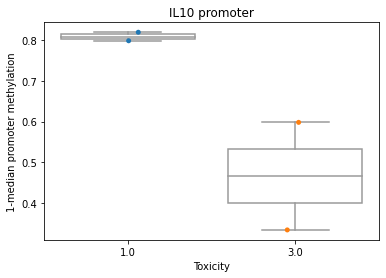

In [11]:
ax = sns.boxplot(x="Toxicity", y='1-'+txttoadd+' promoter methylation', data=merged,color='white')
ax = sns.stripplot(x="Toxicity", y='1-'+txttoadd+' promoter methylation', data=merged)
plt.title(genename+" promoter")
plt.savefig(promoter_avg_file+".pdf")